# Práctica 6 (Simulación, segunda parte)

<font color='blue'>
    
---

<strong>1. Generación de contraseñas</strong>

Tenemos un sistema para producir contraseñas. Este sistema genera contraseñas formadas por <strong>4 letras distintas</strong> seguidas de <strong>3 números</strong>.  
Sabiendo que hay 26 letras y no se distinguen mayúsculas de minúsculas, se pide:

a) Si cojo una contraseña, nos interesa el suceso  
   $$A = \text{“tener exactamente dos vocales”}$$
    
Calcula $P(A)$.  

b) Haz un programa que genere una contraseña con este sistema.  
c) Ejecuta el programa 10000 veces y comprueba con los datos obtenidos si las frecuencias se parecen a la probabilidad calculada en el primer apartado.  

---

<strong>2. Generación de números</strong>

Tenemos dos sistemas para generar números:

- Sistema 1: números de 6 dígitos  
- Sistema 2: números de 7 dígitos  

Usamos el primer sistema el 30% de las veces y el segundo el resto.

a) Si cojo un número, nos interesa el suceso  
    
$$A = \text{“tener todos los dígitos distintos”}$$

Calcula $P(A)$.  

b) Haz un programa que escoja un sistema y genere un número con el sistema elegido. 
    
c) Ejecuta el programa 10000 veces y comprueba si las frecuencias se parecen a las probabilidades calculadas en el primer apartado.  
    
d) Modifica el programa anterior para crear un <strong>data.frame</strong> con dos variables:
- La primera indica el sistema elegido.
- La segunda indica si el suceso $A$ se ha producido o no.

Calcula $P(A \mid S_1)$ y $P(S_1 \mid A)$ y comprueba los resultados con los obtenidos mediante la simulación.

---

<strong>3. Lanzamiento de 5 dados</strong>

Se lanzan 5 dados equilibrados, cada uno con 6 caras numeradas del 1 al 6.  

Explica por qué los posibles resultados de una tirada y sus probabilidades teóricas son, en cada uno de los casos detallados, los siguientes:

- <strong>Dis</strong>: los 5 resultados distintos 
    
$$P(\text{Dis}) = \frac{6\cdot5\cdot4\cdot3\cdot2}{6^5} = 0.0925925926 $$

- <strong>Par</strong>: un resultado aparece dos veces y los otros tres son distintos  

$$P(\text{Par}) = \binom{5}{2}\frac{6\cdot5\cdot4\cdot3}{6^5} = 0.4629629630 $$

- <strong>DPar</strong>: dos resultados se repiten dos veces cada uno y el otro es distinto  

$$P(\text{DPar}) = \binom{5}{2}\cdot6\cdot\binom{3}{2}\frac{5\cdot4}{6^5} = 0.2314814815$$

- <strong>Trío</strong>: un resultado se repite tres veces y los otros dos son distintos  

    
$$P(\text{Trío}) = \binom{5}{3}\frac{6\cdot5\cdot4}{6^5} = 0.1543209877 $$

- <strong>Full</strong>: un resultado se repite tres veces y otro se repite dos veces  

$$P(\text{Full}) = \binom{6}{3}\frac{6\cdot5}{6^5} = 0.0385802469 $$

- <strong>Póker</strong>: un resultado se repite cuatro veces y el otro es distinto  

$$P(\text{Póker}) = \binom{5}{4}\frac{6\cdot5}{6^5} = 0.0192901235 $$

- <strong>Repóker</strong>: los cinco resultados iguales  

$$P(\text{Repóker}) = \frac{6}{6^5} = 0.0007716049 $$

a) Haz un programa que simule el lanzamiento de 5 dados.  
b) Introduce 7 variables para contar cuántas veces se repite cada tipo de tirada y repite el procedimiento 1000 veces.  
c) Repite el proceso con un dado trucado donde \(P(1)=P(2)=1/3\).  
d) Para un tipo de tirada (por ejemplo <strong>Póker</strong>), repite el experimento 40 veces y estudia las frecuencias obtenidas.


</font> 


## 1. Generación de contraseñas

### 1.a - Probabilidad de tener exactamente dos vocales

In [1]:

from scipy.special import comb, factorial

P = (comb(4,2)*5*4*21*20)/(factorial(26)/factorial(22))
P


0.14046822742474915

### 1.b - Generador de contraseñas

In [2]:

import random
import string

def generar_contraseña():
    letras = list(string.ascii_lowercase)
    digitos = list(range(10))
    L = random.sample(letras, 4)
    D = [random.choice(digitos) for _ in range(3)]
    return L + D

generar_contraseña()


['x', 'p', 'o', 's', 1, 0, 2]

### 1.c - Simulación de 10,000 contraseñas

In [3]:

vocales = {'a', 'e', 'i', 'o', 'u'}
resultados = []

for _ in range(10000):
    L = random.sample(string.ascii_lowercase, 4)
    D = [random.choice(range(10)) for _ in range(3)]
    num_vocales = sum(1 for letra in L if letra in vocales)
    resultados.append(num_vocales == 2)

sum(resultados) / len(resultados)


0.1456

# Ejercicio 2: Dos sistemas de generación de números


## 2.a) Probabilidad de tener todos los dígitos distintos

In [4]:
# %%
P_A_S1 = (10*9*8*7*6*5) / 10**6
P_A_S2 = (10*9*8*7*6*5*4) / 10**7
P_A = P_A_S1 * 0.3 + P_A_S2 * 0.7
P_S1_A = (P_A_S1 * 0.3) / P_A

P_A, P_A_S1, P_S1_A



(0.087696, 0.1512, 0.5172413793103449)

### 2.b, 2.c, 2.d, 2.e) Simulación del proceso 10,000 veces y estimaciones

In [5]:
S = []  # sistema elegido
A = []  # si tiene todos los dígitos distintos
digitos=[0,1,2,3,4,5,6,7,8,9]

for _ in range(10000):
    sistema = random.choices([1, 2], weights=[0.3, 0.7])[0]
    S.append(sistema)
    n_digitos = 6 if sistema == 1 else 7
    numero = random.choices(digitos, k=n_digitos)
    A.append(len(set(numero)) == len(numero))

import pandas as pd
import numpy as np

df = pd.DataFrame({'S': S, 'A': A})
df

,S,A
0,2,False
1,2,False
2,2,False
3,2,True
4,2,False
...,...,...
9995,2,False
9996,2,False
9997,2,False
9998,1,False


In [6]:

# Frecuencia conjunta
freq = pd.crosstab(df['A'], df['S'])
freq

S,1,2
A,,
False,2518,6608
True,446,428


In [7]:
# Probabilidades condicionales
cond_filas = freq.div(freq.sum(axis=1), axis=0)
print(cond_filas)

S             1         2
A                        
False  0.275915  0.724085
True   0.510297  0.489703


In [8]:
cond_columnas = freq.div(freq.sum(axis=0), axis=1)
print(cond_columnas)

S             1        2
A                       
False  0.849528  0.93917
True   0.150472  0.06083


In [9]:
# Comparaciones con los valores teóricos
cond_filas.loc[True, 1], P_S1_A 

(0.5102974828375286, 0.5172413793103449)

In [10]:
cond_columnas.loc[True, 1], P_A_S1

(0.150472334682861, 0.1512)

# Ejercicio 3: Simulación de lanzamientos de 5 dados

### 3.a) Clasificación de tipo de tirada según la tabla de frecuencias

In [11]:
import pandas as pd
import numpy as np

In [12]:
def tipo_tirada(tirada):
    valores = pd.Series(tirada).value_counts()
    long = len(valores)
    maxi = valores.max()
    mini = valores.min()
    if long == 5:
        return "Dist"
    elif long == 4:
        return "Par"
    elif long == 3 and maxi == 2:
        return "DPar"
    elif long == 3 and maxi == 3:
        return "Trio"
    elif long == 2 and mini == 2:
        return "Ful"
    elif long == 2 and mini == 1:
        return "Pok"
    elif long == 1:
        return "RPok"

In [13]:
# Ejemplo:
for _ in range(10):
    t = random.choices(range(1,7), k=5)
    print(t, tipo_tirada(t))

[1, 1, 1, 3, 4] Trio
[2, 4, 4, 3, 6] Par
[6, 6, 5, 2, 5] DPar
[3, 5, 5, 3, 5] Ful
[5, 4, 5, 3, 4] DPar
[2, 6, 1, 5, 2] Par
[4, 4, 2, 6, 3] Par
[6, 4, 1, 4, 1] DPar
[2, 6, 1, 6, 5] Par
[1, 2, 6, 3, 6] Par


 ### 3.b) Frecuencias relativas de cada tipo de tirada (1000 repeticiones)

In [14]:
from collections import Counter

tipos = []

for _ in range(1000):
    t = random.choices(range(1,7), k=5)
    tipos.append(tipo_tirada(t))

contador = Counter(tipos)
total = sum(contador.values())
frecuencias_relativas = {k: v/total for k, v in contador.items()}
contador

Counter({'Trio': 149,
         'Par': 480,
         'DPar': 233,
         'Dist': 89,
         'Pok': 19,
         'Ful': 30})

In [15]:
frecuencias_relativas

{'Trio': 0.149,
 'Par': 0.48,
 'DPar': 0.233,
 'Dist': 0.089,
 'Pok': 0.019,
 'Ful': 0.03}

### 3.c) Repetición con dado trucado (1 y 2 con probabilidad 1/3, el resto igual entre sí)

In [16]:
prob_trucado = [1/3, 1/3] + [(1 - 2/3)/4]*4  # para valores 1 al 6
valores = [1,2,3,4,5,6]

tipos_trucado = []

for _ in range(1000):
    t = random.choices(valores, weights=prob_trucado, k=5)
    tipos_trucado.append(tipo_tirada(t))

contador_trucado = Counter(tipos_trucado)
frecuencias_relativas_trucado = {k: v/1000 for k, v in contador_trucado.items()}
contador_trucado

Counter({'Ful': 113,
         'DPar': 256,
         'Par': 269,
         'Trio': 230,
         'Dist': 38,
         'Pok': 83,
         'RPok': 11})

In [17]:
frecuencias_relativas_trucado

{'Ful': 0.113,
 'DPar': 0.256,
 'Par': 0.269,
 'Trio': 0.23,
 'Dist': 0.038,
 'Pok': 0.083,
 'RPok': 0.011}

### 3.d) Estudio de la variable "frecuencias" para tipo Pok, repitiendo el experimento 40 veces

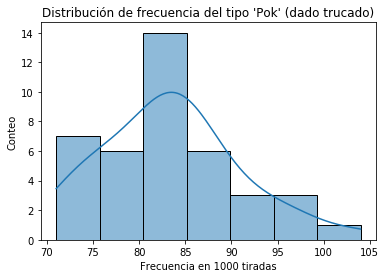

(83.4, 7.39526875779373)

In [18]:
frecuencias_pok = []

for _ in range(40):
    pok_count = 0
    for _ in range(1000):
        t = random.choices(valores, weights=prob_trucado, k=5)
        if tipo_tirada(t) == "Pok":
            pok_count += 1
    frecuencias_pok.append(pok_count)

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(frecuencias_pok, kde=True)
plt.title("Distribución de frecuencia del tipo 'Pok' (dado trucado)")
plt.xlabel("Frecuencia en 1000 tiradas")
plt.ylabel("Conteo")
plt.show()

np.mean(frecuencias_pok), np.std(frecuencias_pok)

### ¿Qué es un KDE (Kernel Density Estimate)?
---

````markdown
La orden:

```python
sns.histplot(frecuencias_pok, kde=True)
````

nos dice que, además de dibujar el histograma, lo aproximemos con una curva suave llamada **KDE** (Kernel Density Estimate o *estimación de densidad por kernel*).
Esta curva no representa una función exacta ni la distribución teórica del experimento, sino una **aproximación suave** de cómo se distribuyen los datos observados.

Un KDE funciona así:

* Tomamos cada dato de la muestra y le "colocamos encima" una pequeña campana suave (un kernel, normalmente gaussiano).
* Sumamos todas esas campanas individuales.
* Obtenemos una curva continua que aproxima la forma de la distribución.

El objetivo es **suavizar el histograma**, que puede ser irregular, especialmente cuando hay pocos datos.
Mientras el histograma depende del tamaño del intervalo (“bins”), el KDE es una representación más fluida y menos sensible a estos parámetros.

En simulaciones como la nuestra, donde repetimos un experimento varias veces y obtenemos una colección de valores numéricos, el KDE suele parecer una **campana normal** porque muchas cantidades aleatorias (como conteos binomiales) se aproximan a una distribución gaussiana cuando el número de ensayos es grande.

```
```
